### Through this file, we create the following files as the data we use for training our model



1. Final_News.dat - tickers, date, news, time
2. processed_fin_data.csv - tickers, date, close, open
3. sentiment.csv - tickers, date, sentiment of news on the day for each ticker

First, however, let's take a look at what the final News and Financial Data files look like, if they need to be directly imported/downloaded and used




In [ ]:
import pandas as pd

In [ ]:
import pickle
f = open("Final_News.dat", 'rb')
final_news = pickle.load(f)

In [ ]:
news_df = pd.DataFrame(final_news, columns=["Symbol", "News", "Date", "Time"])
news_df = news_df.set_index(["Symbol", "Date"])

In [ ]:
news_df

News     Time
Symbol Date                                                                 
A      Apr-05-24  Agilent (A) to Bolster DCG Segment With Upcomi...  09:55AM
       Apr-04-24  Agilent Brings Great Science to Life at Analyt...  08:00AM
       Apr-03-24  Agilent at AACR 2024: Empowering Breakthroughs...  08:00AM
       Apr-02-24  Agilent (A) Boosts LSAG Segment With Advanced ...  11:15AM
       Apr-02-24  Agilent and UC San Diego Launch Center of Exce...  08:00AM
...                                                             ...      ...
ZTS    Sep-13-23  Long-Term Returns of Bill Ackmans Activist Tar...  09:55AM
       Sep-12-23         15 Best S&P 500 Stocks For Dividend Growth  05:11PM
       Sep-12-23                30 Most Owned Dog Breeds in America  06:40AM
       Sep-09-23  Long-Term Returns of Scott Ferguson Activist T...  07:01AM
       Sep-07-23  Why Is Zoetis (ZTS) Down 1.3% Since Last Earni...  11:30AM

[49993 rows x 2 columns]

In [ ]:
processed_data = pd.read_csv("processed_fin_data.csv", index_col=[0,1])

In [ ]:
processed_data

Close        Open
Symbol Date                             
A      Apr-06-22  132.710007  132.009995
       Apr-07-22  135.929993  132.899994
       Apr-08-22  134.869995  135.710007
       Apr-11-22  131.259995  133.220001
       Apr-12-22  125.389999  131.690002
...                      ...         ...
ZTS    Apr-01-24  167.020004  168.990005
       Apr-02-24  165.009995  165.669998
       Apr-03-24  162.970001  165.000000
       Apr-04-24  165.520004  165.210007
       Apr-05-24  165.860001  165.759995

[250682 rows x 2 columns]

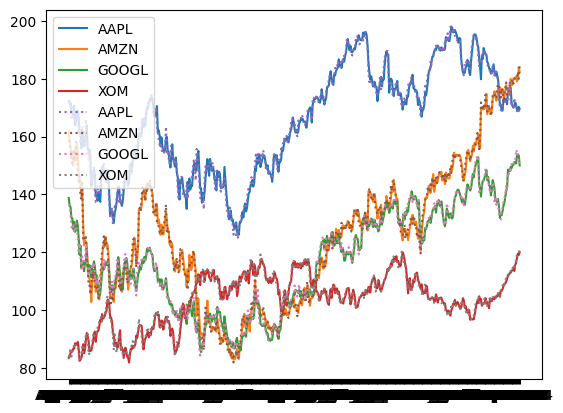

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for date, new_df in processed_data.loc[["AAPL", "AMZN", "GOOGL", "XOM"], :].groupby(level = 0):
    ax.plot(new_df.index.get_level_values('Date').values,
            new_df['Open'],
            label = new_df.index.get_level_values('Symbol').values[0],
            # marker = 'o',
            linestyle = '-')

for date, new_df in processed_data.loc[["AAPL", "AMZN", "GOOGL", "XOM"], :].groupby(level = 0):
    ax.plot(new_df.index.get_level_values('Date').values,
            new_df['Close'],
            label = new_df.index.get_level_values('Symbol').values[0],
            # marker = 'o',
            linestyle = ':')

ax.legend(frameon = True)

plt.show()

### Obtaining Financial News Data for S&P 500

First up, we load the S&P500 companies from a CSV file that includes information about several key pieces of information about these companies. We simply extract the Symbol (Stock Ticker) and Name of the Company.



In [ ]:
sp500 = pd.read_csv("/content/sp-500-index-04-06-2024.csv").loc[:502, ["Symbol", "Name"]]

In [ ]:
sp500

,Symbol,Name
0,A,Agilent Technologies
1,AAL,American Airlines Gp
2,AAPL,Apple Inc
3,ABBV,Abbvie Inc
4,ABNB,Airbnb Inc Cl A
...,...,...
498,XYL,Xylem Inc
499,YUM,Yum! Brands
500,ZBH,Zimmer Biomet Holdings
501,ZBRA,Zebra Technologies


Finviz is a financial news website that displays the most recent pieces of news about the most prominent stocks. We append the stock ticker to the base URL to create the updated URL to scrape the news from, and use BeautifulSoup to retrieve the relevant data.

In [ ]:
sp500["URL"] = sp500["Symbol"].apply(lambda x: f"https://finviz.com/quote.ashx?t={x}")

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
import time

In [ ]:
from urllib.request import Request, urlopen
news = {}

In [ ]:
count = 0

for symbol in sp500.loc[3, "Symbol"]:
  news[symbol] = []
  time.sleep(2)

  req = Request(
      url=f'https://finviz.com/quote.ashx?t={symbol}',
      headers={'User-Agent': 'Mozilla/5.0'}
  )
  try:
    webpage = urlopen(req).read()
  except:
    print(count, "Not Found")
    count += 1
    continue
  html = BeautifulSoup(webpage)
  html_table = html.find(id='news-table')
  rows = html_table.findAll('tr')

  for i, table_row in enumerate(rows):
    try:
      link_text = table_row.a.get_text()
      data_text = table_row.td.get_text()
      entry = [link_text.strip(" \r\n"), data_text.strip(" \r\n")]
      news[symbol].append(entry)
    except:
      pass

  count += 1

In [ ]:
news

{'A': [['Agilent (A) to Bolster DCG Segment With Upcoming Solutions',
   'Apr-05-24 09:55AM'],
  ['Agilent Brings Great Science to Life at Analytica 2024',
   'Apr-04-24 08:00AM'],
  ['Agilent at AACR 2024: Empowering Breakthroughs in Cancer Research and Diagnostics',
   'Apr-03-24 08:00AM'],
  ['Agilent (A) Boosts LSAG Segment With Advanced Dilution System',
   'Apr-02-24 11:15AM'],
  ['Agilent and UC San Diego Launch Center of Excellence in Cellular Intelligence',
   '08:00AM'],
  ['Agilent Launches New Advanced Dilution System to Increase Lab Efficiency',
   'Apr-01-24 08:00AM'],
  ['Earnings Growth & Price Strength Make Agilent Technologies (A) a Stock to Watch',
   'Mar-29-24 09:30AM'],
  ['Agilent (A) Up 7.6% Since Last Earnings Report: Can It Continue?',
   'Mar-28-24 11:30AM'],
  ['Agilent Technologies Inc (A) Senior Vice President Philip Binns Sells 2,827 Shares',
   'Mar-27-24 05:01PM'],
  ['Top Pictet Fund Manager Sees Biotech Stocks Joining AI-Euphoria',
   'Mar-26-24 02:00

Finally, we create a list of the retreived news pieces and store them into a binary file for future use.

In [ ]:
import datetime
final_news = []

for symbol, entries in news.items():
  if entries:
    date = ""
    for entry in entries:
      if entry[1].startswith("Today"):
        date = datetime.date.today().strftime("%b-%d-%y")
      elif len(entry[1]) > 7:
        date = entry[1][:9]

      final_news.append([symbol, entry[0], date, entry[1][-7:]])


In [ ]:
f = open("Final_News.dat", "wb")
pickle.dump(final_news, f)

### Code to calculate sentiments from News Data

In [ ]:
f = open("Final_News.dat", 'rb')
final_news = pickle.load(f)

In [ ]:
news_df = pd.DataFrame(final_news, columns=["Symbol", "News", "Date", "Time"])
news_df = news_df.set_index(["Symbol", "Date"])

In [ ]:
news_df

News     Time
Symbol Date                                                                 
A      Apr-05-24  Agilent (A) to Bolster DCG Segment With Upcomi...  09:55AM
       Apr-04-24  Agilent Brings Great Science to Life at Analyt...  08:00AM
       Apr-03-24  Agilent at AACR 2024: Empowering Breakthroughs...  08:00AM
       Apr-02-24  Agilent (A) Boosts LSAG Segment With Advanced ...  11:15AM
       Apr-02-24  Agilent and UC San Diego Launch Center of Exce...  08:00AM
...                                                             ...      ...
ZTS    Sep-13-23  Long-Term Returns of Bill Ackmans Activist Tar...  09:55AM
       Sep-12-23         15 Best S&P 500 Stocks For Dividend Growth  05:11PM
       Sep-12-23                30 Most Owned Dog Breeds in America  06:40AM
       Sep-09-23  Long-Term Returns of Scott Ferguson Activist T...  07:01AM
       Sep-07-23  Why Is Zoetis (ZTS) Down 1.3% Since Last Earni...  11:30AM

[49993 rows x 2 columns]

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

In [ ]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
nlp = pipeline("text-classification", model=finbert, tokenizer=tokenizer)

In [ ]:
sentiment_df = pd.DataFrame(index = news_df.index.unique(), columns = ["Sentiment"])

In [ ]:
count = 0
unique_indices = news_df.index.unique()

for index in unique_indices:
  news = list(news_df.loc[index, "News"].values)
  print(index, news)
  results = nlp(news)
  overall = 0


  for result in results:
    if result['label'] == "Positive": score = 1
    elif result['label'] == "Negative": score = -1
    elif result['label'] == "Neutral": score = 0
    score *= result['score']
    overall += score

  print(overall)
  overall /= len(results)
  print(results)
  # print(overall)
  sentiment_df.loc[index, "Sentiment"] = overall

  if count % 100 == 0: print(count)
  count += 1

In [ ]:
sentiment_df.to_csv("sentiment.csv")

### Code to create processed_fin_data.csv

This retrieves the stock prices for the stock tickers the days we retrieved the news articles for

In [ ]:
!pip install yfinance

In [ ]:
query = " ".join(list(news_df.reset_index()["Symbol"].unique()))

In [ ]:
import yfinance as yf
data = yf.download(query, period="2y")

[*********************100%%**********************]  398 of 398 completed


In [ ]:
data = data[["Close", "Open"]]

In [ ]:
processed_data = data.stack(1).reset_index().sort_values(by=["Ticker", "Date"])

In [ ]:
processed_data['Date'] = processed_data['Date'].apply(lambda x: x.strftime('%b-%d-%y'))

In [ ]:
processed_data = processed_data.set_index(["Ticker", "Date"])

In [ ]:
processed_data.index.names = ['Symbol', 'Date']

In [ ]:
processed_data.to_csv("processed_fin_data.csv")